<a href="https://colab.research.google.com/github/JuanArmas/BigDataSNS/blob/main/Act_4_1_Bancos_JuanArmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4.1 - Segmentación de clientes según datos bancarios

#Autor:
Juan Airam Armas Alemán

#Github:
https://github.com/JuanArmas/BigDataSNS/blob/main/Actividad_3_7_Terremotos_Juan_Armas.ipynb
#Drive:
https://drive.google.com/drive/folders/1Jxc5SQ6ImP0X97n1zVE8vFDCV0RHCCa4?usp=sharing


Título: Statlog (German Credit Data)

Url: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

Descripción: Este conjunto de datos clasifica a las personas descritas según un conjunto de atributos como riesgos crediticios buenos o malos. Viene en dos formatos (uno todo numérico).

In [113]:
import numpy as np
import pandas as pd
import sklearn.neighbors
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


from scipy import cluster
from google.colab import drive
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering



In [114]:
# Generamos acceso al drive
drive.mount('/content/drive')

Mounted at /content/drive


In [115]:
# x_data_numeric_repository = "/content/german.data-numeric"
x_data_numeric_repository = "/content/drive/MyDrive/Practica Clustering Bancos/german.data-numeric"

In [116]:
# indicamos como separador "\s+" es decir, tiene espacios en blanco como separadores
df_data_numeric = pd.read_csv(x_data_numeric_repository, sep='\s+', header=None)


In [117]:
df_data_numeric

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


In [6]:
df_data_numeric.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24],
      dtype='int64')

#Generamos un histograma
De esta manera podemos observar si existe algún desbalanceo de datos y decidir su escalado o no.

También cambiamos los encabezados de las columnas de números a nombres identificativos, tal cual indica el documento de word adjunto.

Igualmente nos damos cuenta de que el dataframe que hemos generado tiene más columnas de las indicadas en el documento adjunto, por lo que las dejamos con nombres genéricos.

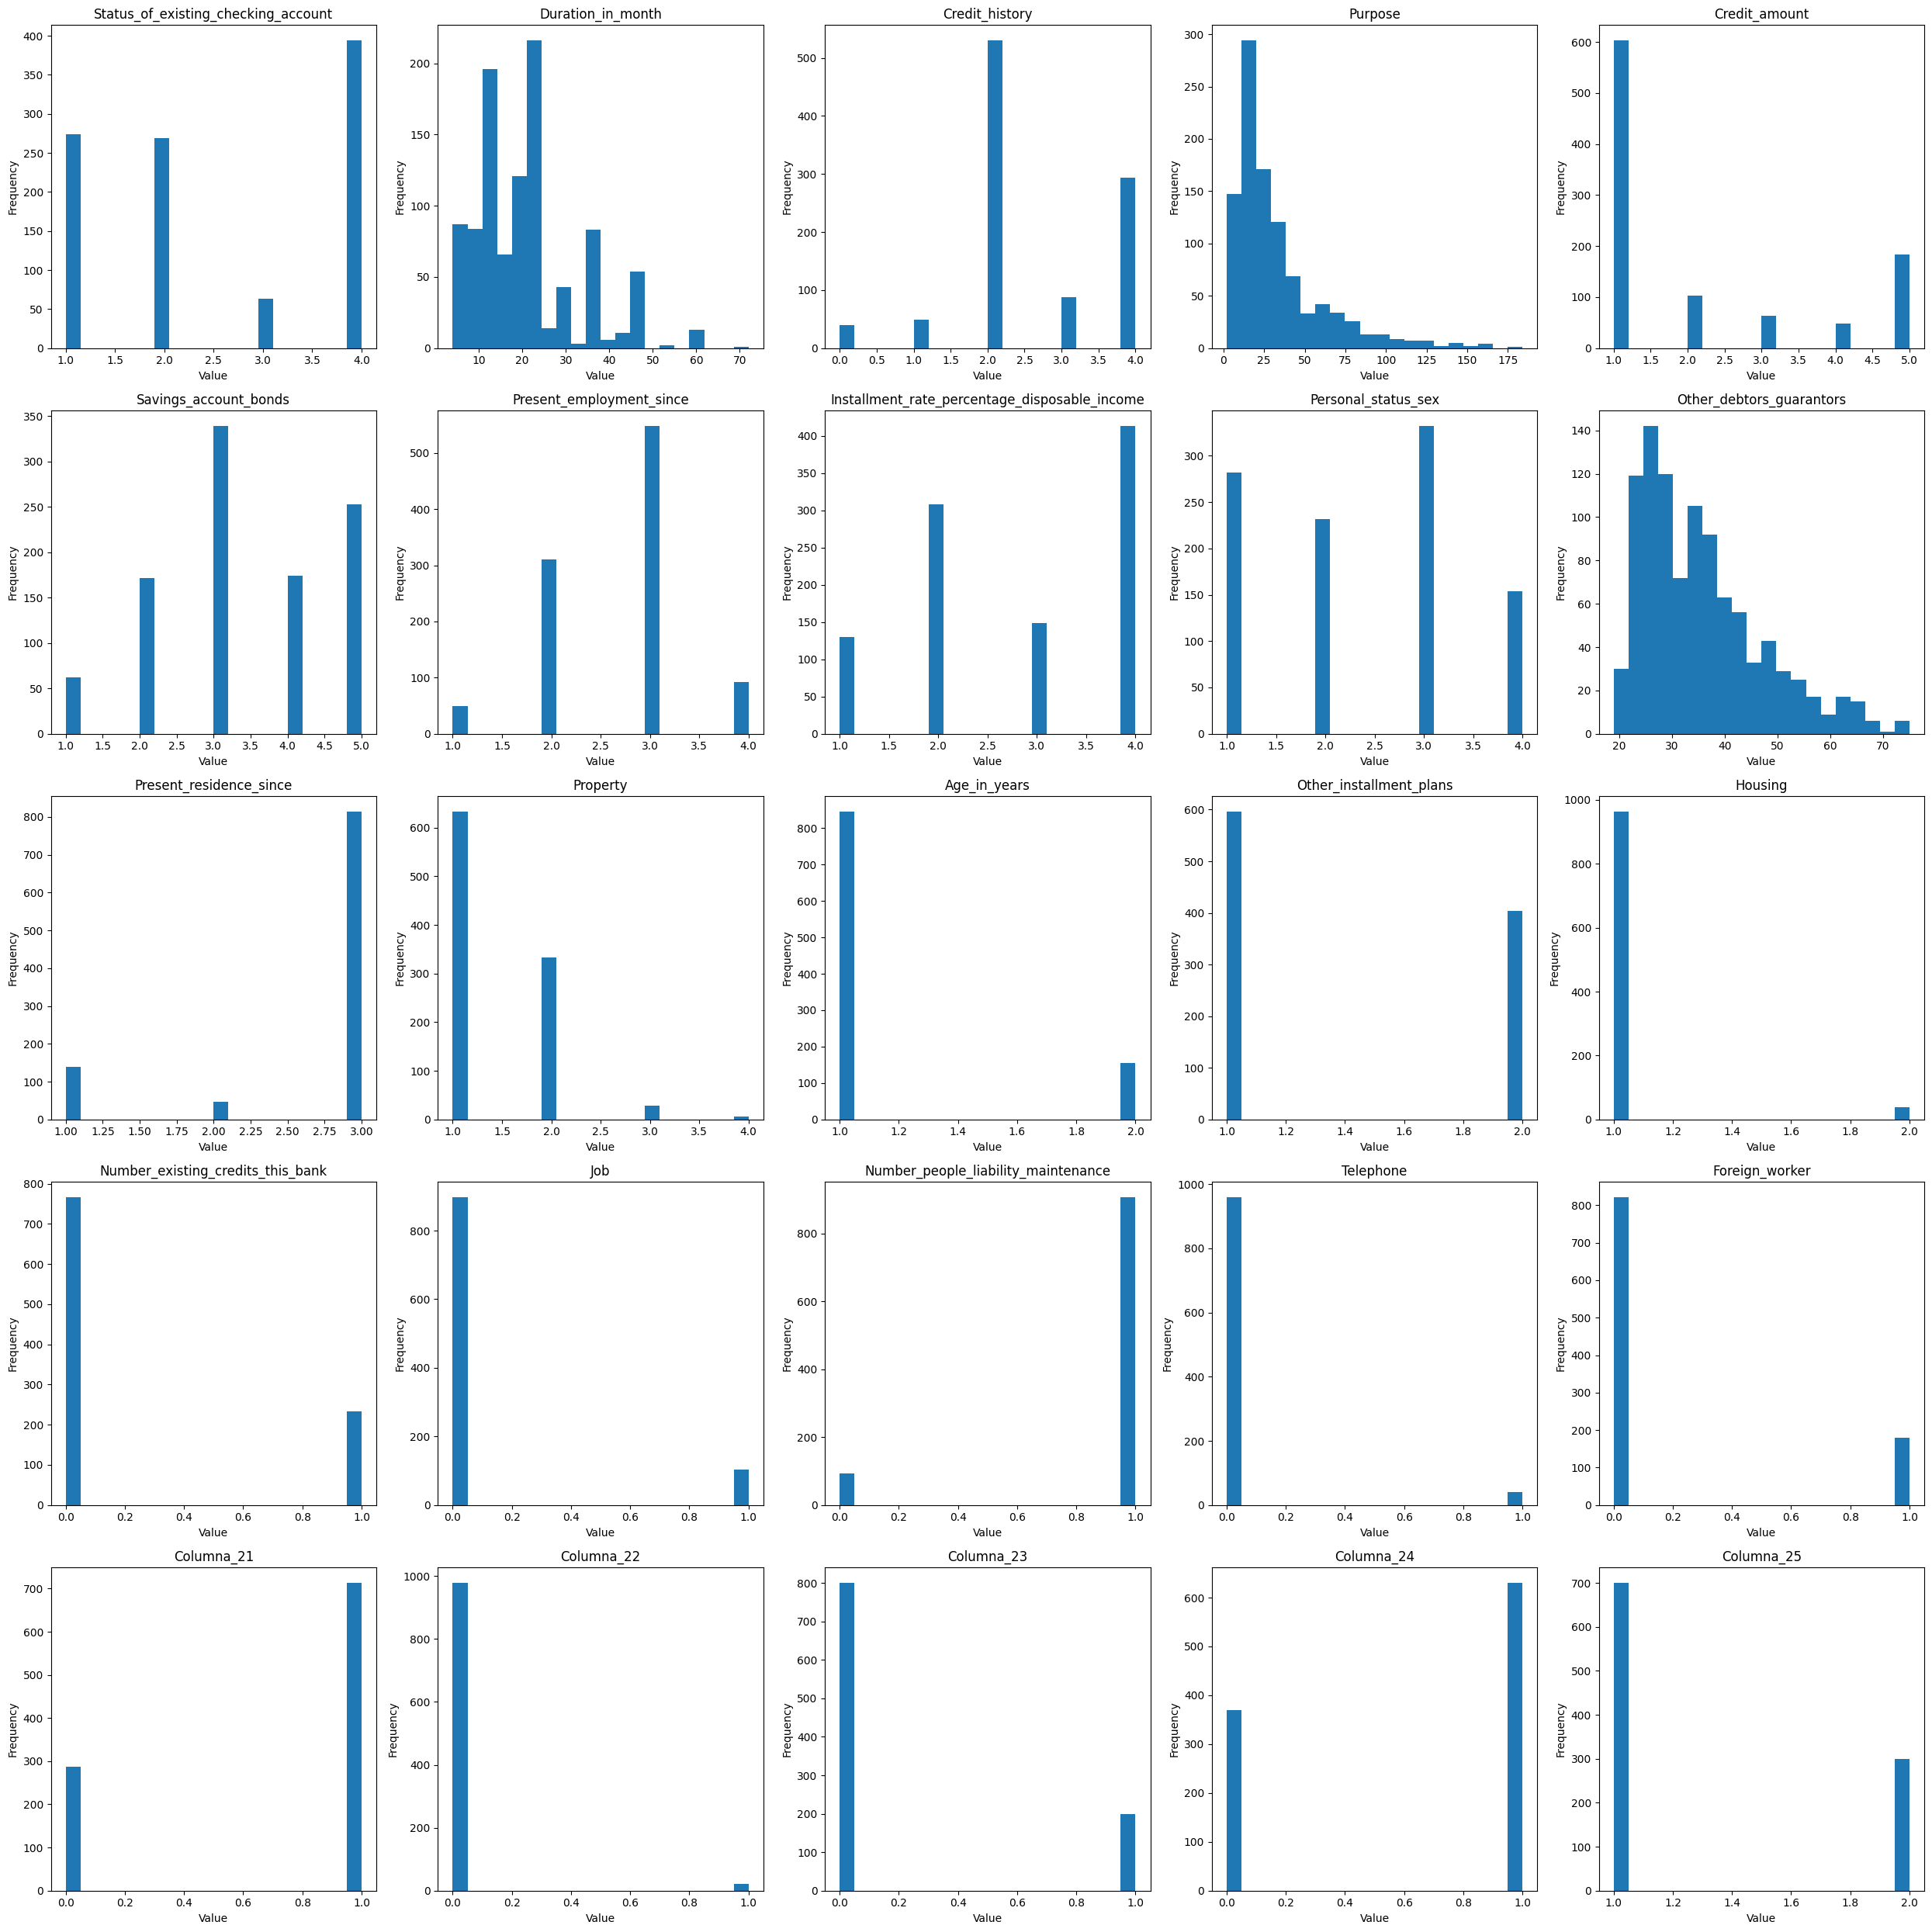

In [7]:


# Lista de nombres descriptivos para las columnas
column_names = [
    'Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history',
    'Purpose', 'Credit_amount', 'Savings_account_bonds', 'Present_employment_since',
    'Installment_rate_percentage_disposable_income', 'Personal_status_sex',
    'Other_debtors_guarantors', 'Present_residence_since', 'Property', 'Age_in_years',
    'Other_installment_plans', 'Housing', 'Number_existing_credits_this_bank',
    'Job', 'Number_people_liability_maintenance', 'Telephone', 'Foreign_worker',
    'Columna_21', 'Columna_22', 'Columna_23', 'Columna_24', 'Columna_25'
]

# Asignamos los nombres de las columnas al DataFrame
df_data_numeric.columns = column_names

# Generamos histogramas para cada columna
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))  # Ajustamos el tamaño de la figura según el número de columnas

for i, column in enumerate(df_data_numeric.columns):
    ax = axes[i // 5, i % 5]  # Seleccionar el eje correspondiente
    df_data_numeric[column].plot(kind='hist', ax=ax, title=column, bins=20)  # Crear histograma con 20 bins
    ax.set_xlabel('Value')  # Etiqueta del eje x

# Ajustamos diseño y espacio entre subplots
plt.tight_layout()
plt.show()


In [8]:
df_data_numeric.columns

Index(['Status_of_existing_checking_account', 'Duration_in_month',
       'Credit_history', 'Purpose', 'Credit_amount', 'Savings_account_bonds',
       'Present_employment_since',
       'Installment_rate_percentage_disposable_income', 'Personal_status_sex',
       'Other_debtors_guarantors', 'Present_residence_since', 'Property',
       'Age_in_years', 'Other_installment_plans', 'Housing',
       'Number_existing_credits_this_bank', 'Job',
       'Number_people_liability_maintenance', 'Telephone', 'Foreign_worker',
       'Columna_21', 'Columna_22', 'Columna_23', 'Columna_24', 'Columna_25'],
      dtype='object')

Vemos como hay un desbalanceo apreciable entre los datos, podemos observar como las 10 ultimas características están entre rangos de 0-1 mientras que otras, como purpose, llega hasta casi 200. procederemos a realizar un standarScaler.

In [9]:
# Codgo para hacer el escalamiento y a la par borrar las 5 ultimas columnas sin nombre de caracetrísticas,
#  evaluar esto antes de hacerlo

# # Crear un objeto StandardScaler
# scaler = StandardScaler()

# # Estandarizar las características (excluir columnas no deseadas)
# X_scaled = scaler.fit_transform(df_data_numeric.drop(['Columna_21', 'Columna_22', 'Columna_23', 'Columna_24', 'Columna_25'], axis=1))

# # Convertir de nuevo a DataFrame (opcional)
# X_scaled_df = pd.DataFrame(X_scaled, columns=df_data_numeric.columns[:-5])  # Excluir las columnas no deseadas

# # Mostrar estadísticas resumidas de las características estandarizadas
# print(X_scaled_df.describe())

In [10]:
# Inicializamos el objeto StandardScaler
scaler = StandardScaler()

numeric_columns = df_data_numeric.columns.tolist()  # Lista de todas las columnas

# Aplicamos StandardScaler a las columnas numéricas
df_data_numeric[numeric_columns] = scaler.fit_transform(df_data_numeric[numeric_columns])

# Convertir de nuevo a DataFrame (opcional)
df_data_numeric_scaled_df = pd.DataFrame(df_data_numeric, columns=df_data_numeric.columns)  # Excluir las columnas no deseadas



Revisamos de nuevo el dataframe con un histograma

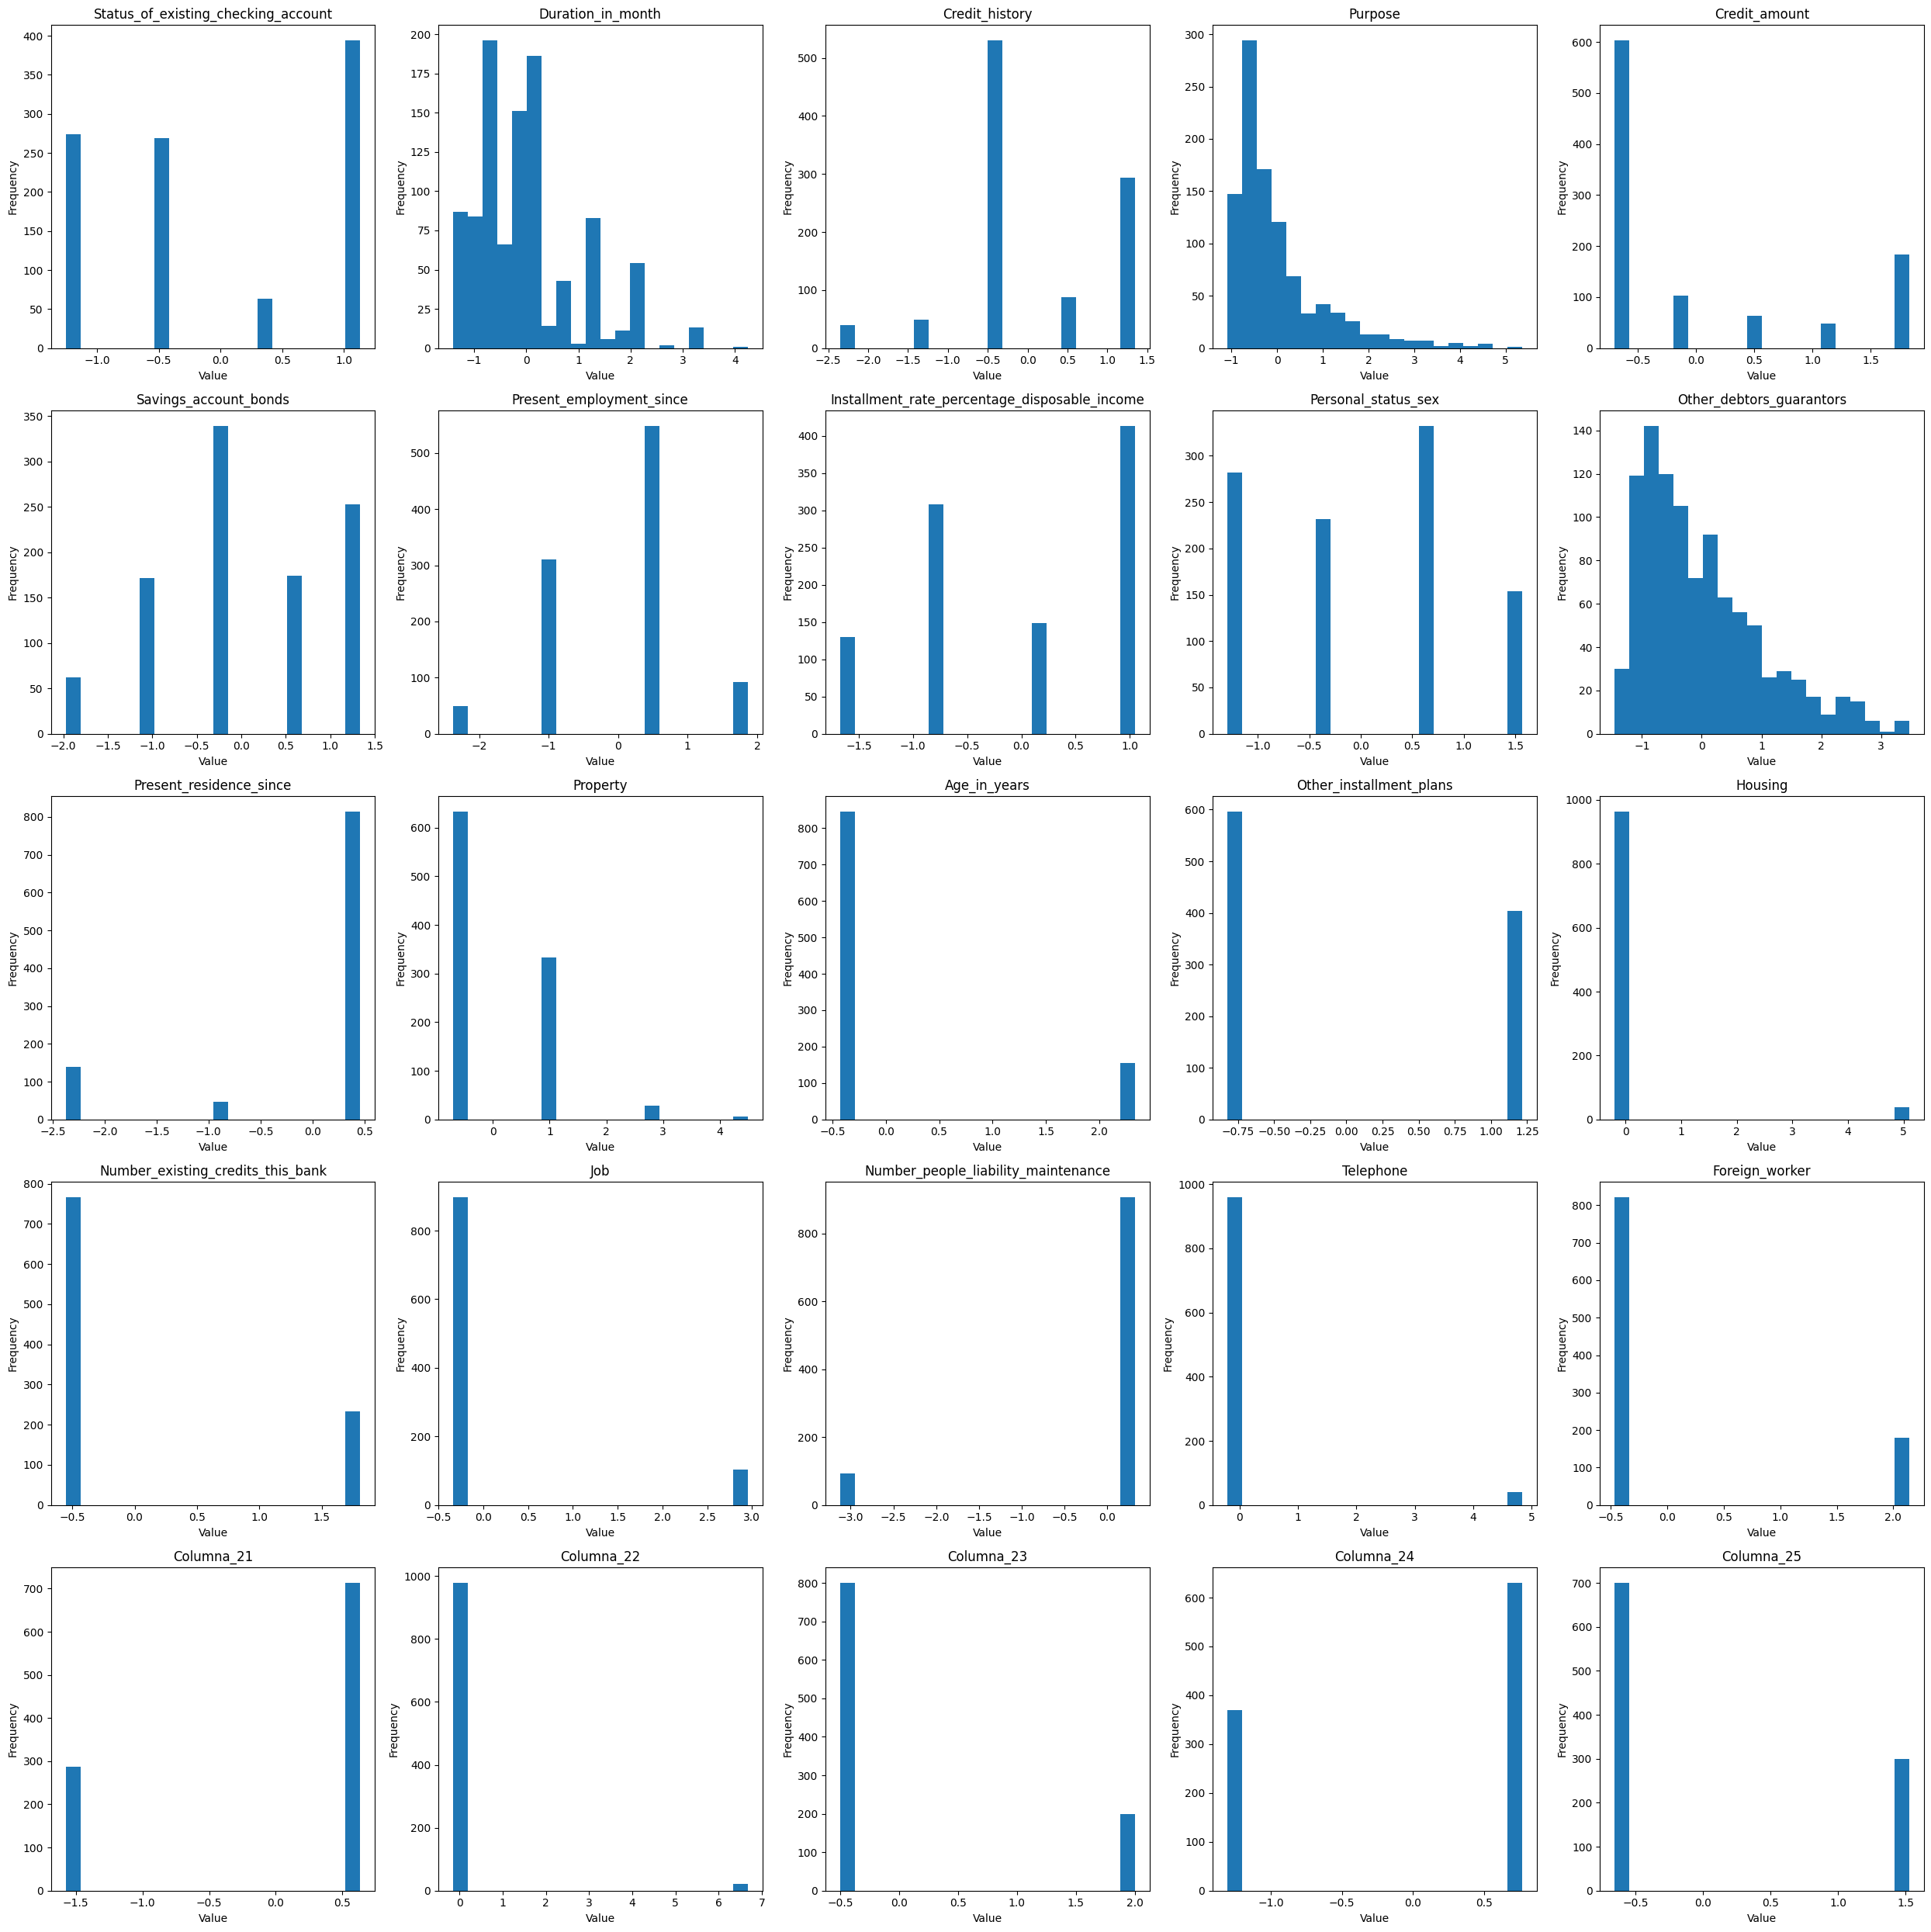

In [11]:
# Generamos histogramas para cada columna
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))  # Ajustamos el tamaño de la figura según el número de columnas

for i, column in enumerate(df_data_numeric_scaled_df.columns):
    ax = axes[i // 5, i % 5]  # Seleccionar el eje correspondiente
    df_data_numeric_scaled_df[column].plot(kind='hist', ax=ax, title=column, bins=20)  # Crear histograma con 20 bins
    ax.set_xlabel('Value')  # Etiqueta del eje x

# Ajustamos diseño y espacio entre subplots
plt.tight_layout()
plt.show()

Vemos como los resultados indican que se ha aplicado correctamente el escalado con StandardScaler. Observando los valores escalados, podemos ver que las características ahora tienen una media cercana a cero y una desviación estándar cercana a uno, lo cual es lo esperado.

#Iniciamos la clusterización
Ponemos en marcha la clusterización con Silhouette Coefficient para Determinar el Número de Clústeres

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

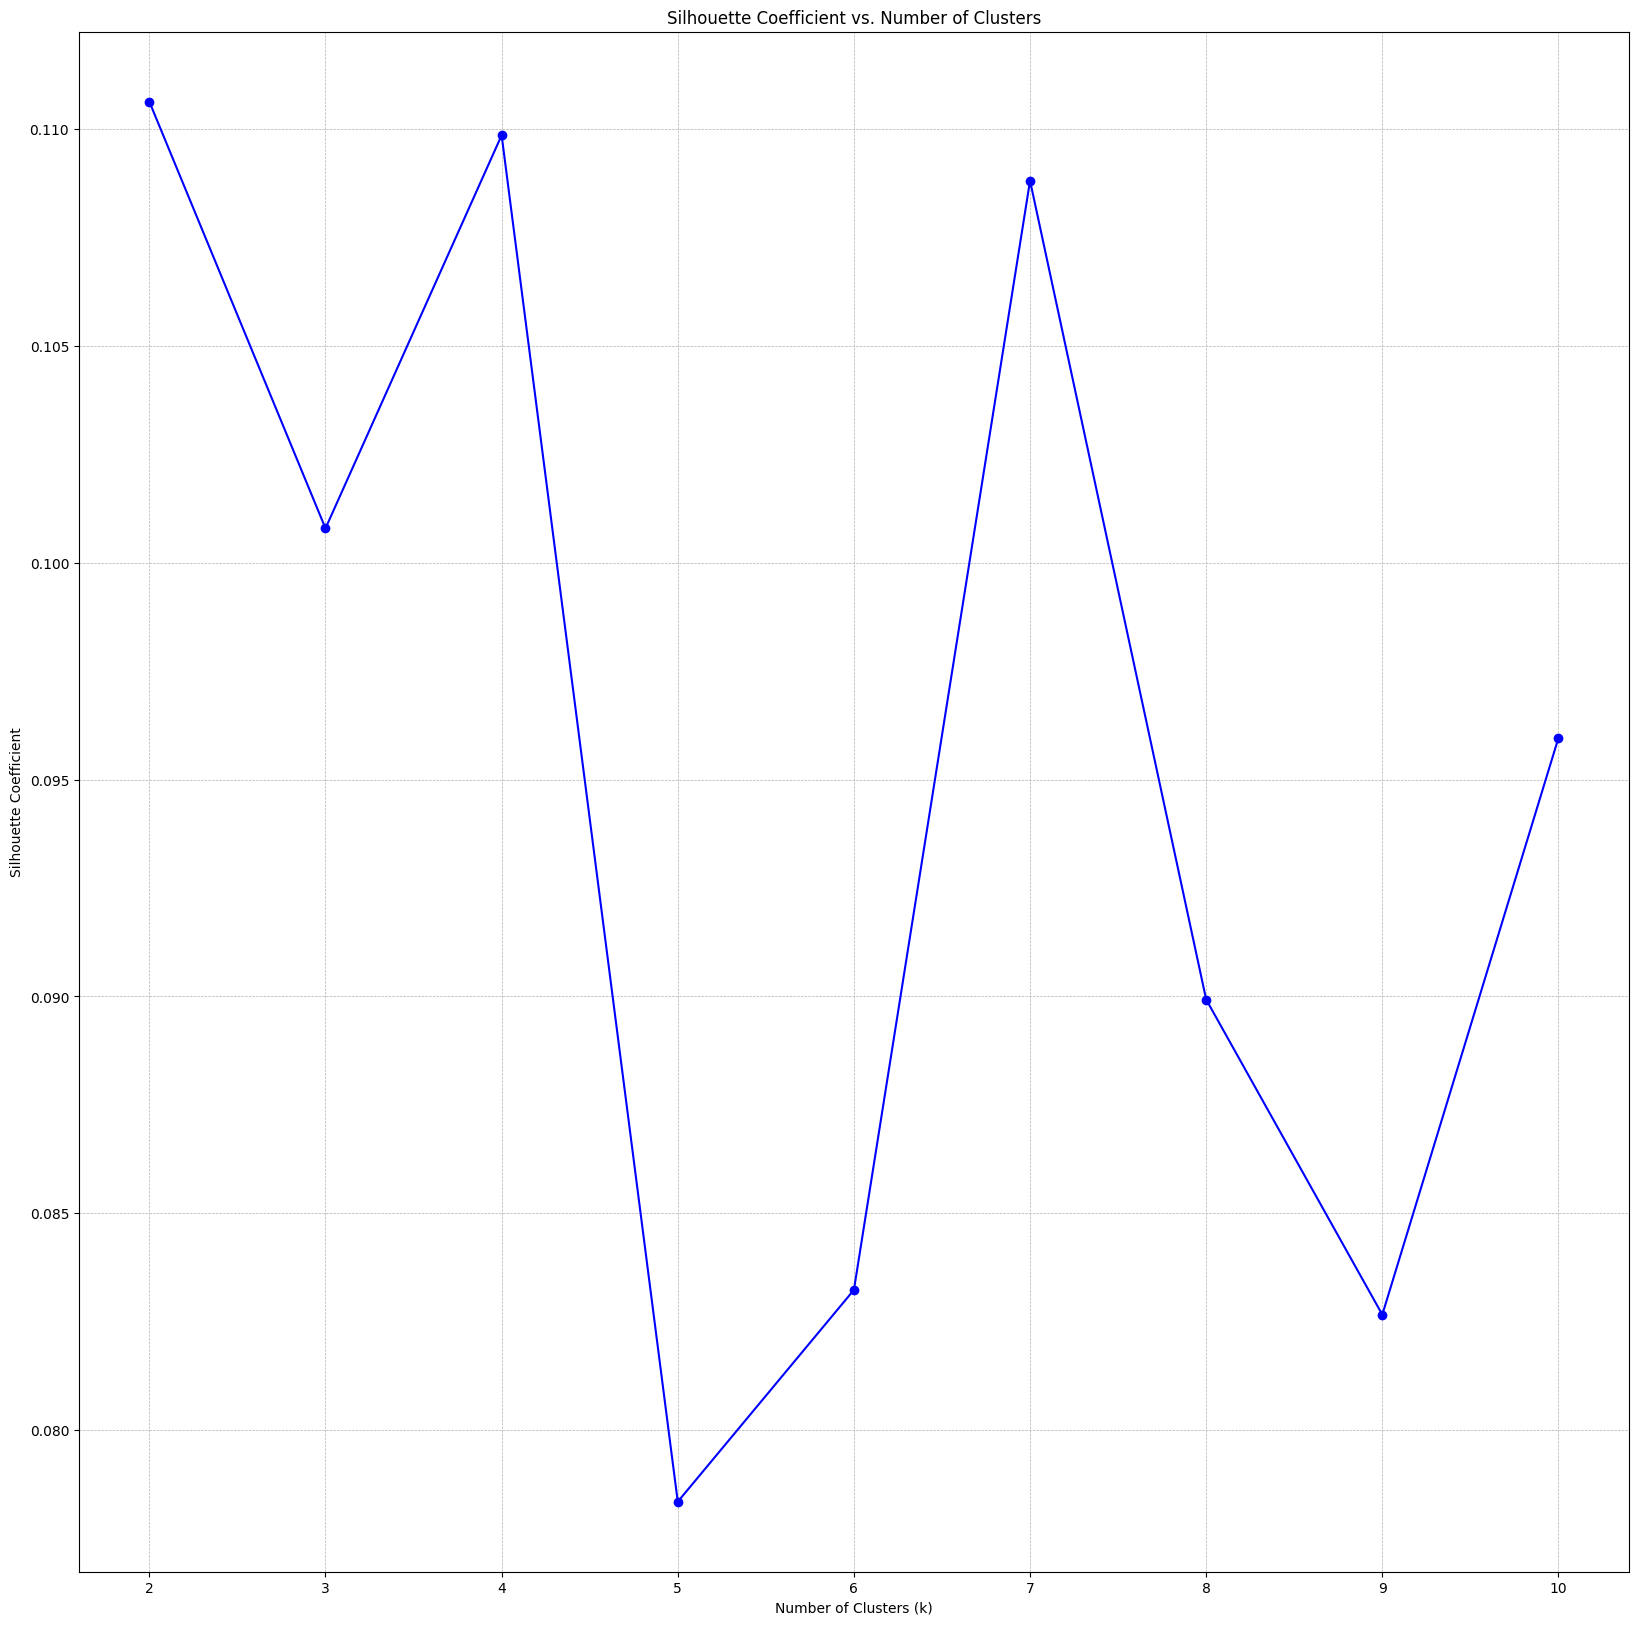

Número óptimo de clústeres (k): 2


In [13]:
# Lista para almacenar los valores de Silhouette Coefficient
silhouette_scores = []

# Rango de valores de k (número de clústeres) a probar
k_range = range(2, 11)  # probamos desde 2 hasta 11 clústeres

# Iterar sobre diferentes valores de k
for k in k_range:
    # Inicializamos y ajustar el modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_data_numeric_scaled_df)

    # Calculamos el Silhouette Coefficient para el modelo actual
    score = silhouette_score(df_data_numeric_scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

# Graficamos el Silhouette Coefficient vs. número de clústeres (k)
plt.figure(figsize=(20,20))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Coefficient vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Obtenemos el valor de k que maximiza el Silhouette Coefficient
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Número óptimo de clústeres (k): {optimal_k}')


#Detalle a tener en cuenta:
Esta información comienza a ser muy interesante ya que como veiamos en el documento adjunto, hay una matriz de costos para lograr el objetivo final:

Clasificación Correcta:
- Clasificar un cliente "Good" como "Good" tiene un costo de 0.
- Clasificar un cliente "Bad" como "Bad" tiene un costo de 0.

Clasificación Incorrecta:
- Clasificar un cliente "Good" como "Bad" tiene un costo de 1.
- Clasificar un cliente "Bad" como "Good" tiene un costo de 5.

En este contexto:
- "Good" se refiere a clientes que son considerados buenos o de bajo riesgo.
- "Bad" se refiere a clientes que son considerados malos o de alto riesgo.

La clusterización nos ha indicado que el numero optimo de clusteres son 2:
- (1 = Good,  2 = Bad)


#Dendograma

In [69]:
# Convertir DataFrame a matriz numpy (si es necesario)
df_data_numeric_scaled_num = df_data_numeric_scaled_df.values

In [70]:
# Calcular la matriz de distancias usando la distancia euclidiana
distances = sch.linkage(df_data_numeric_scaled_num, method='ward')  # Puedes probar diferentes métodos (e.g., 'single', 'complete', 'average')

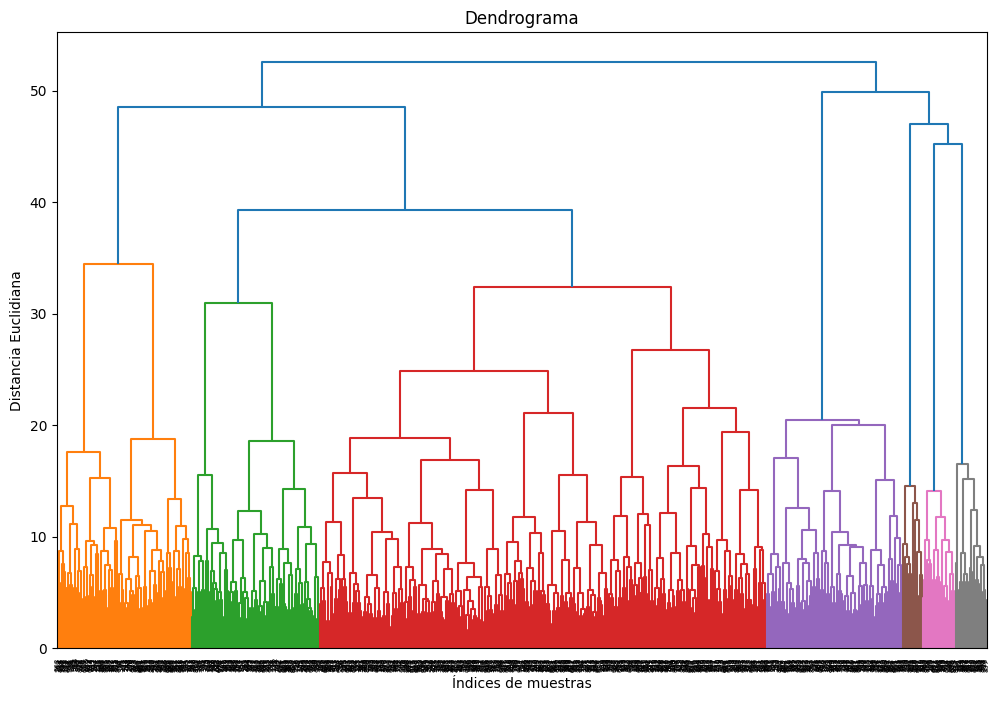

In [71]:
# Graficar el dendrograma
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(distances)
plt.title('Dendrograma')
plt.xlabel('Índices de muestras')
plt.ylabel('Distancia Euclidiana')
plt.show()


In [72]:
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(df_data_numeric_scaled_num)
clusters = cluster.hierarchy.linkage(D, method='single')
avD = np.average(D)

# Obtenemos el grupo al que pertenece cada observación #no he entendido bien esta parte, preguntar
threshold = 32.5 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

print("Distancia Media\t {:6.2f}".format(avD))
# Contamos el número de "labels" distintas en el vector
print("Número de clusters creados por agrupamiento {}".format(len(set(labels))))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
<ipython-input-72-88cbdc7d0a47>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='single')


Distancia Media	   6.89
Número de clusters creados por agrupamiento 7


#K-means

In [73]:
# Inicializar y ajustar el modelo K-Means con k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_data_numeric_scaled_num)

# Obtener las etiquetas de clúster asignadas a cada instancia
cluster_labels = kmeans.labels_

# Calcular el Silhouette Score para evaluar la calidad de los clústeres
silhouette_avg = silhouette_score(df_data_numeric_scaled_num, cluster_labels)
print(f'Silhouette Score para k = 2: {silhouette_avg}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score para k = 2: 0.11063767617468792


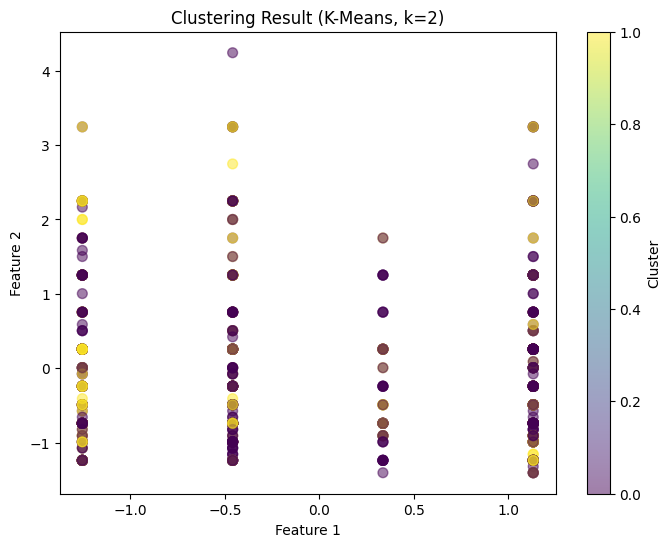

In [74]:
# Visualizar los clústeres en un gráfico de dispersión (solo para datos bidimensionales)
# Suponiendo que X tiene 2 dimensiones
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], df_data_numeric_scaled_num[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering Result (K-Means, k=2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


El Silhouette Score se obtuvo para k=2 es aproximadamente 0.11. Esto significa que los clústeres resultantes no están muy bien separados y hay cierta superposición o cercanía entre los clústeres.

#Aplicando PCA

In [75]:
# Inicializar y ajustar el modelo PCA para reducir a 2 dimensiones (o el número deseado)
pca = PCA(n_components=optimal_k)  # Reducir a 2 dimensiones para visualización
X_pca = pca.fit_transform(df_data_numeric_scaled_num)

In [82]:
# Crear un DataFrame con los datos reducidos por PCA
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca.explained_variance_ratio_)


[0.10193272 0.09108534]


In [83]:
# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=df_data_numeric_scaled_df.columns)

,PC-1,PC-2
Status_of_existing_checking_account,-0.064204,-0.341696
Duration_in_month,0.417432,-0.000359
Credit_history,-0.089093,-0.343936
Purpose,0.422713,-0.013292
Credit_amount,0.071474,-0.225737
Savings_account_bonds,0.079761,-0.308883
Present_employment_since,-0.033918,-0.127414
Installment_rate_percentage_disposable_income,0.183207,-0.093044
Personal_status_sex,0.403703,-0.033447
Other_debtors_guarantors,0.031807,-0.286939


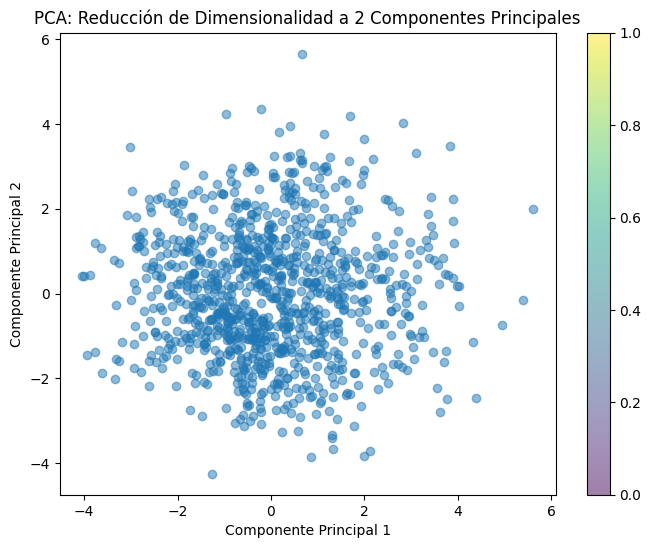

In [103]:
# Graficar los datos reducidos en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Componente Principal 1'], df_pca['Componente Principal 2'], alpha=0.5)
plt.title('PCA: Reducción de Dimensionalidad a 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()  # Agrega una barra de color para mostrar los clústeres
plt.show()

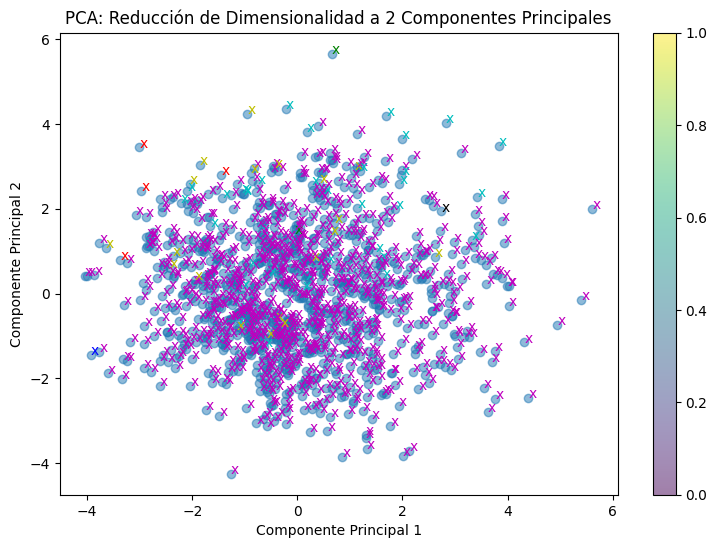

In [108]:
colores = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colores = np.hstack([colores] * 20)

# # Crear la figura y el gráfico
plt.figure(figsize=(9, 6))
for index, row in df_pca.iterrows():
    plt.text(row['Componente Principal 1'], row['Componente Principal 2'], 'x', color=colores[labels[index]])
plt.scatter(df_pca['Componente Principal 1'], df_pca['Componente Principal 2'], alpha=0.5)
plt.title('PCA: Reducción de Dimensionalidad a 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()  # Agrega una barra de color para mostrar los clústeres
plt.show()

# Exportar a excel

In [109]:
# Definir los datos del PCA como un diccionario
data = {
    'Feature': [
        'Status_of_existing_checking_account', 'Duration_in_month', 'Credit_history', 'Purpose', 'Credit_amount',
        'Savings_account_bonds', 'Present_employment_since', 'Installment_rate_percentage_disposable_income',
        'Personal_status_sex', 'Other_debtors_guarantors', 'Present_residence_since', 'Property', 'Age_in_years',
        'Other_installment_plans', 'Housing', 'Number_existing_credits_this_bank', 'Job', 'Number_people_liability_maintenance',
        'Telephone', 'Foreign_worker', 'Columna_21', 'Columna_22', 'Columna_23', 'Columna_24', 'Columna_25'
    ],
    'PC-1': [
        -0.064204, 0.417432, -0.089093, 0.422713, 0.071474, 0.079761, -0.033918, 0.183207,
        0.403703, 0.031807, -0.052819, -0.018239, -0.033545, 0.270112, -0.168036, -0.112192,
        0.248669, 0.064490, 0.009794, 0.125073, -0.294217, -0.044686, -0.302039, 0.126158, 0.171351
    ],
    'PC-2': [
        -0.341696, -0.000359, -0.343936, -0.013292, -0.225737, -0.308883, -0.127414, -0.093044,
        -0.033447, -0.286939, -0.033009, -0.261200, -0.086127, -0.189749, 0.057351, 0.051541,
        -0.132983, -0.204189, 0.182918, 0.325656, -0.253335, 0.092975, 0.089101, -0.072081, 0.326398
    ]
}

# Crear un DataFrame a partir del diccionario de datos
df_pca_results = pd.DataFrame(data)

# Establecer la columna 'Feature' como índice del DataFrame (opcional)
df_pca_results.set_index('Feature', inplace=True)



In [110]:
# Especificar la ruta del archivo de Excel
excel_filename = 'pca_results.xlsx'

# Escribir el DataFrame en un archivo de Excel
df_pca_results.to_excel(excel_filename)

print(f'Resultados del PCA exportados exitosamente a "{excel_filename}"')


Resultados del PCA exportados exitosamente a "pca_results.xlsx"
